### NMF非负矩阵分解

In [1]:
from sklearn import datasets
from sklearn.decomposition import NMF

In [2]:
X,y = datasets.load_iris(return_X_y=True)
X # 非负

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2],
       [5.4, 3.9, 1.7, 0.4],
       [4.6, 3.4, 1.4, 0.3],
       [5. , 3.4, 1.5, 0.2],
       [4.4, 2.9, 1.4, 0.2],
       [4.9, 3.1, 1.5, 0.1],
       [5.4, 3.7, 1.5, 0.2],
       [4.8, 3.4, 1.6, 0.2],
       [4.8, 3. , 1.4, 0.1],
       [4.3, 3. , 1.1, 0.1],
       [5.8, 4. , 1.2, 0.2],
       [5.7, 4.4, 1.5, 0.4],
       [5.4, 3.9, 1.3, 0.4],
       [5.1, 3.5, 1.4, 0.3],
       [5.7, 3.8, 1.7, 0.3],
       [5.1, 3.8, 1.5, 0.3],
       [5.4, 3.4, 1.7, 0.2],
       [5.1, 3.7, 1.5, 0.4],
       [4.6, 3.6, 1. , 0.2],
       [5.1, 3.3, 1.7, 0.5],
       [4.8, 3.4, 1.9, 0.2],
       [5. , 3. , 1.6, 0.2],
       [5. , 3.4, 1.6, 0.4],
       [5.2, 3.5, 1.5, 0.2],
       [5.2, 3.4, 1.4, 0.2],
       [4.7, 3.2, 1.6, 0.2],
       [4.8, 3.1, 1.6, 0.2],
       [5.4, 3.4, 1.5, 0.4],
       [5.2, 4.1, 1.5, 0.1],
       [5.5, 4.2, 1.4, 0.2],
       [4.9, 3

In [4]:
(X < 0).sum() # False 0 True 对应 1

0

In [5]:
nmf = NMF(n_components=2,max_iter=1000)

W = nmf.fit_transform(X)
display(W[:5])

array([[0.41324371, 0.10506861],
       [0.36526388, 0.14126424],
       [0.37757125, 0.10223772],
       [0.34981602, 0.1492182 ],
       [0.41563004, 0.09571702]])

In [6]:
H = nmf.components_
H

array([[11.05890917,  7.97350461,  2.22400134,  0.06796582],
       [ 5.0036085 ,  2.0079157 ,  4.5922802 ,  1.64852844]])

In [7]:
X_ = W.dot(H)
display(X[:5],X_[:5])

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

array([[5.09574684, 3.50596954, 1.40155905, 0.20129503],
       [4.746251  , 3.1960799 , 1.46107232, 0.25770357],
       [4.68708374, 3.21585086, 1.30922324, 0.19420373],
       [4.61521306, 3.08887722, 1.46324309, 0.26976598],
       [5.07534539, 3.50621977, 1.36392116, 0.18604087]])

In [8]:
# 和之前pca【X_pca】,之前lda【X_lda】
X_nmf = nmf.fit_transform(X)
X_nmf # 数据变少，相对于原来的数据，关键局部特征数据
# 使用X_nmf 比较轻量级的数据，表示原来的数据，替代【图片类型原数据，往往比较大】

array([[0.41324371, 0.10506861],
       [0.36526388, 0.14126424],
       [0.37757125, 0.10223772],
       [0.34981602, 0.1492182 ],
       [0.41563004, 0.09571702],
       [0.42856359, 0.1572765 ],
       [0.3761242 , 0.11440775],
       [0.39302319, 0.13172574],
       [0.33197911, 0.14156243],
       [0.36909998, 0.14470395],
       [0.43623036, 0.11423328],
       [0.375189  , 0.14903129],
       [0.36394888, 0.13071439],
       [0.36080432, 0.06219985],
       [0.50204166, 0.03577078],
       [0.49676259, 0.08194308],
       [0.45870244, 0.07598311],
       [0.40940897, 0.11410956],
       [0.44031148, 0.16060493],
       [0.42448247, 0.11090485],
       [0.39855272, 0.17840803],
       [0.41311166, 0.12778848],
       [0.42516994, 0.00838804],
       [0.36406321, 0.20884687],
       [0.35258486, 0.21000133],
       [0.35534419, 0.18341983],
       [0.37781899, 0.17013099],
       [0.41085874, 0.12690085],
       [0.41085738, 0.11442019],
       [0.35496712, 0.16320776],
       [0.

### LLE代码实现

In [24]:
from sklearn.manifold import LocallyLinearEmbedding
from sklearn.decomposition import PCA
from sklearn import datasets

import matplotlib.pyplot as plt


In [25]:
from mpl_toolkits.mplot3d.axes3d import Axes3D

In [26]:
# 可以认为t属于目标值，标记的是各个点，在流形中的位置
X,t = datasets.make_swiss_roll(n_samples=1500,noise=0.05,random_state=100)

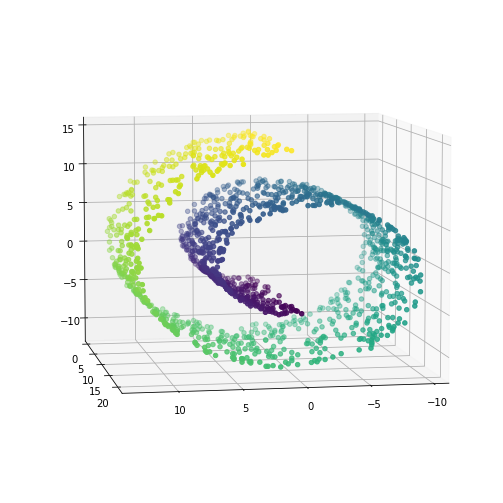

In [27]:
fig = plt.figure(figsize=(12,9))
# axes3D = Axes3D(fig)
axes3D = fig.add_subplot(projection = '3d') # 添加一个子视图，设置成3d
axes3D.scatter(X[:,0],X[:,1],X[:,2],c = t)
axes3D.view_init(7,80)

In [28]:
X.shape

(1500, 3)

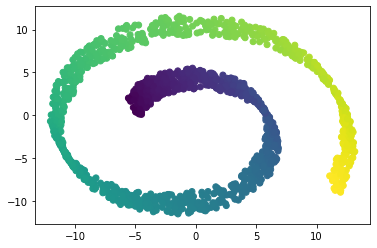

In [29]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)
plt.scatter(X_pca[:,0],X_pca[:,1],c = t)

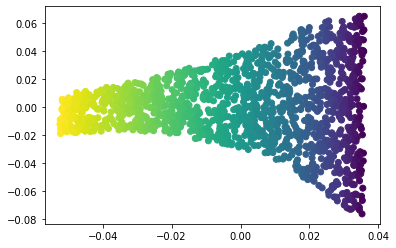

In [31]:
lle = LocallyLinearEmbedding(n_components=2,n_neighbors=15)
X_lle = lle.fit_transform(X)

plt.scatter(X_lle[:,0],X_lle[:,1],c = t)

## 1. 决策树构建【账号是否真实】

#### 1.1 构建数据

In [1]:
import numpy as np
import pandas as pd

y = np.array(list('NYYYYYNYYN')) # 表示目标值【是否真实用户】
print(y)

X = pd.DataFrame({'日志密度':list('sslmlmmlms'),
                  '好友密度':list('slmmmlsmss'),
                  '真实头像':list('NYYYYNYYYY')})
X # 表示特征数据

['N' 'Y' 'Y' 'Y' 'Y' 'Y' 'N' 'Y' 'Y' 'N']


,日志密度,好友密度,真实头像
0,s,s,N
1,s,l,Y
2,l,m,Y
3,m,m,Y
4,l,m,Y
5,m,l,N
6,m,s,Y
7,l,m,Y
8,m,s,Y
9,s,s,Y


#### 1.2 模型训练

区分，用户，是否真实：**分类问题**

In [5]:
# 直接运行会报错：ValueError: could not convert string to float: 's'

In [4]:
# 区分，用户，是否真实：分类问题
from sklearn.tree import DecisionTreeClassifier # Class类，分类

# 算法，用法，都是相似的，统一的
model = DecisionTreeClassifier() # 第一次使用，KNN、LogisticRegression

model.fit(X,y)



ValueError: could not convert string to float: 's'

#### 1.3 数据转换【数据清洗】【特征工程】

In [6]:
X['日志密度'] = X['日志密度'].map({'s':0,'m':1,'l':2})
X['好友密度'] = X['好友密度'].map({'s':0,'m':1,'l':2})
X['真实头像'] = X['真实头像'].map({'N':0,'Y':1})
X

,日志密度,好友密度,真实头像
0,0,0,0
1,0,2,1
2,2,1,1
3,1,1,1
4,2,1,1
5,1,2,0
6,1,0,1
7,2,1,1
8,1,0,1
9,0,0,1


#### 1.4 模型训练

In [7]:
model = DecisionTreeClassifier()

model.fit(X,y)

DecisionTreeClassifier()

In [8]:
model.predict(X)

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'N', 'N'], dtype='<U1')

In [9]:
y

array(['N', 'Y', 'Y', 'Y', 'Y', 'Y', 'N', 'Y', 'Y', 'N'], dtype='<U1')

#### 1.5 模型可视化

[Text(0.6, 0.8333333333333334, 'x[1] <= 0.5\ngini = 0.42\nsamples = 10\nvalue = [3, 7]'),
 Text(0.4, 0.5, 'x[0] <= 0.5\ngini = 0.375\nsamples = 4\nvalue = [3, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.0\nsamples = 2\nvalue = [2, 0]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.5\nsamples = 2\nvalue = [1, 1]'),
 Text(0.8, 0.5, 'gini = 0.0\nsamples = 6\nvalue = [0, 6]')]

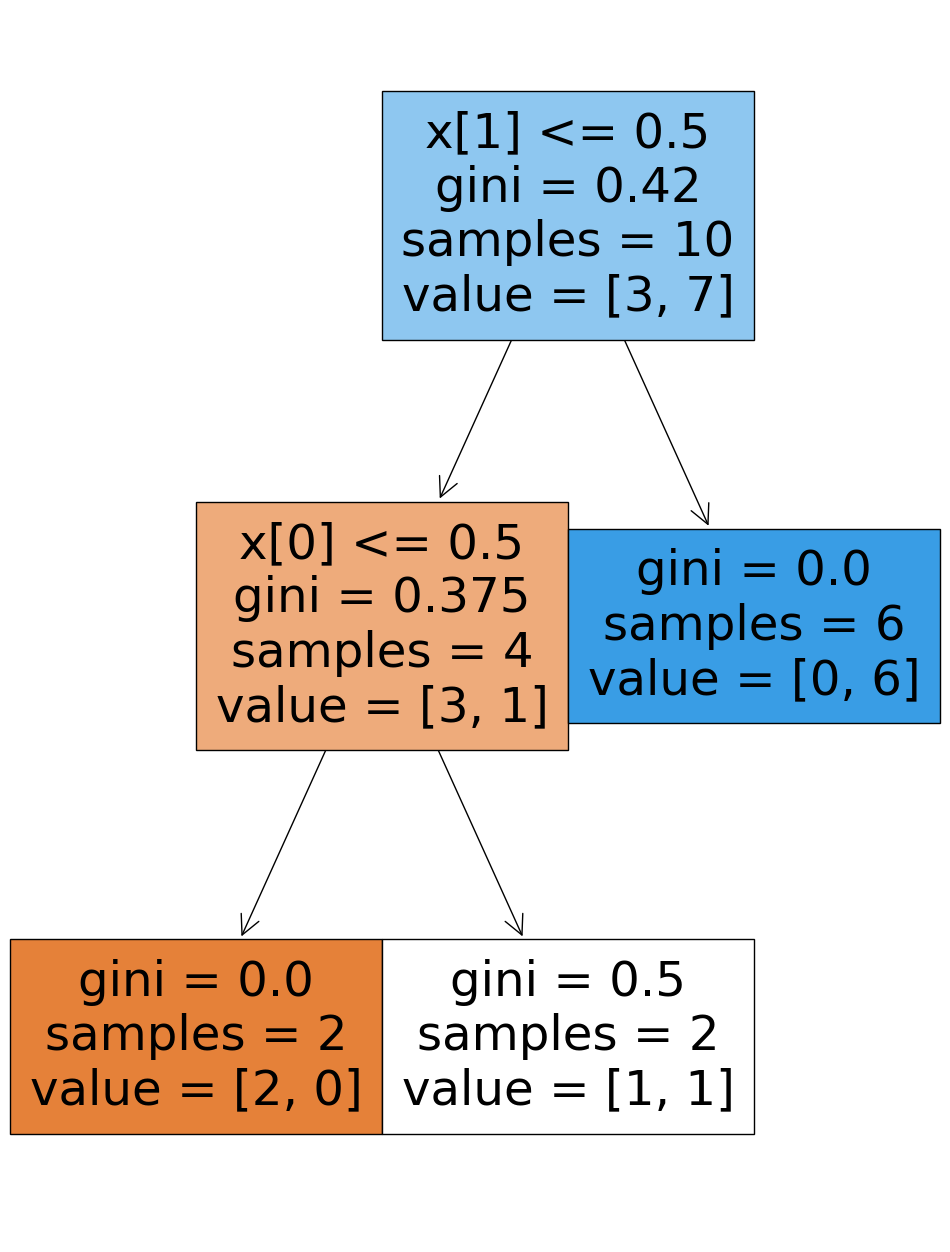

In [11]:
import matplotlib.pyplot as plt
from sklearn import tree

plt.figure(figsize=(12,16))
tree.plot_tree(model,filled=True)  # filled=True 颜色填充

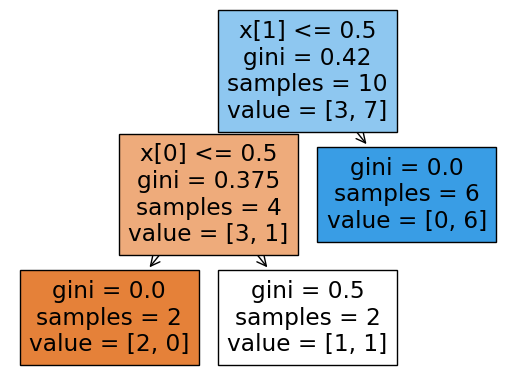

In [12]:
# 赋值接收一下，就不会有文本输出了
_ = tree.plot_tree(model,filled=True)  # filled=True 颜色填充

In [ ]:
from matplotlib import font_manager

fm = font_manager.FontManager()
[font.name for font in fm.ttflist]   # 查看可用字体

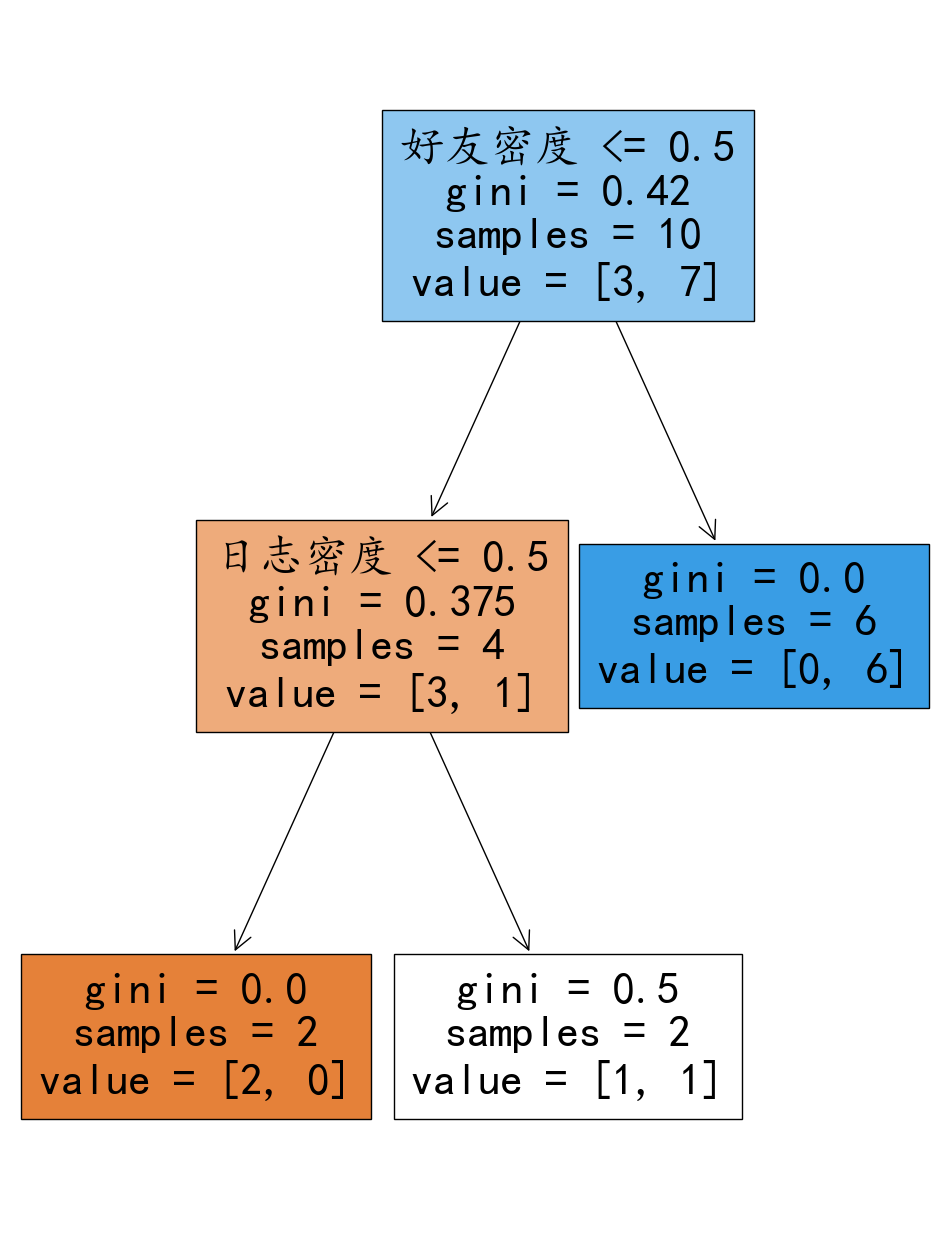

In [13]:
plt.figure(figsize=(12,16))
plt.rcParams['font.family'] = 'KaiTi'
_ = tree.plot_tree(model,filled=True,feature_names=['日志密度','好友密度','真实头像'])